In [9]:
import cv2
import mediapipe as mp
import itertools
import numpy as np
from time import time
import matplotlib.pyplot as plt

import csv
import os
import numpy as np

import glob

In [10]:
# Inicia o mediapipe face mesh
mp_face_mesh = mp.solutions.face_mesh

# Ajusta os landmarks do rosto para imagens
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2, min_detection_confidence=0.5)

# Ajusta os landmarks do rosto para videos
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5,min_tracking_confidence=0.5)

# Inicia a classe de desenho do mediapipe
mp_drawing = mp.solutions.drawing_utils

# Inicia a classe de estilos de desenho do mediapipe
mp_drawing_styles = mp.solutions.drawing_styles

In [11]:
def detectFacialLandmarks(image, face_mesh, display = True, class_name = ''):
    # Converte para o formato RGB e coloca as landmarks
    results = face_mesh.process(image[:,:,::-1])
    
    # Cria uma cópia da imagem de entrada para desenhar as landmarks
    output_image = image[:,:,::-1].copy()
    
    # Verifica se encontrou as landmarks
    if results.multi_face_landmarks:

        # Repete para cada face encontrada
        for face_landmarks in results.multi_face_landmarks:

            # Aplica FACEMESH TESSALATION
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=None, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

            # Aplica FACEMESH CONTOURS
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=None, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
    if display:
        try:
            
            # Extract Face landmarks
            face = results.multi_face_landmarks[0].landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('dataset/coords_train.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
        
        # Retorna imagem antes e depois
        #plt.figure(figsize=[15,15])
        #plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        #plt.subplot(122);plt.imshow(output_image);plt.title("Output");plt.axis('off');
        #return results
    else:
        try:
            
            # Extract Face landmarks
            face = results.multi_face_landmarks[0].landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('dataset/coords_test.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass

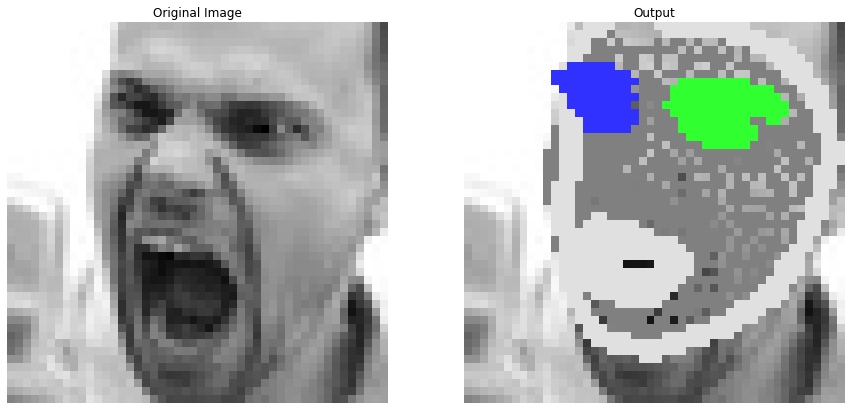

In [12]:
sample_img = cv2.imread('sample2.jpg')
results = detectFacialLandmarks(sample_img, face_mesh_images, display=True)

In [4]:
#num_coords = len(results.multi_face_landmarks[0].landmark)
#num_coords = 468
#num_coords

### Cria colunas Dataset

In [5]:
landmarks = ['class']
num_coords = 468
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

with open('dataset/coords_train.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)
    
with open('dataset/coords_test.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

### Popula Dataset

In [6]:
#x = detectFacialLandmarks(sample_img, face_mesh_images, display=False)
#print(x)

In [7]:
for img in glob.glob("../data/train/angry/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '0')#angry
for img in glob.glob("../data/train/disgust/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '1')#disgust
for img in glob.glob("../data/train/fear/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '2')#fear
for img in glob.glob("../data/train/happy/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '3')#happy
for img in glob.glob("../data/train/neutral/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '4')#neutral
for img in glob.glob("../data/train/sad/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '5')#sad
for img in glob.glob("../data/train/surprise/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=True, class_name = '6')#surprise

In [8]:
for img in glob.glob("../data/test/angry/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '0')#angry
for img in glob.glob("../data/test/disgust/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '1')#disgust
for img in glob.glob("../data/test/fear/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '2')#fear
for img in glob.glob("../data/test/happy/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '3')#happy
for img in glob.glob("../data/test/neutral/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '4')#neutral
for img in glob.glob("../data/test/sad/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '5')#sad
for img in glob.glob("../data/test/surprise/*.jpg"):
    image = cv2.imread(img)
    detectFacialLandmarks(image, face_mesh_images, display=False, class_name = '6')#surprise